# Daily Challenge: Logistic Regression for Admission Prediction

## Your Task

- Data Exploration: Load and visualize the data.
  - Use pandas to load the dataset and examine the first few rows.
  - Create a scatter plot to visualize the data points for students who were admitted versus those who were not based on their exam scores.

- Applying Logistic Regression with scikit-learn:
  - Implement logistic regression using the LogisticRegression function from scikit-learn to find the best parameters for your model.
  - Train the logistic regression model on your dataset.

- Making Predictions:
  - Use the trained logistic regression model to make predictions on your dataset.
  - Calculate the accuracy of your model.

- Model Evaluation:
  - Interpret the result of logistic regression and the accuracy of your model.


In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme()

In [87]:
from sklearn.linear_model import LogisticRegression

### Data Visualization

In [88]:
df = pd.read_csv('ex2data1.txt', names=["exam 1", "exam 2", "Admitted"])
df.head()

,exam 1,exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


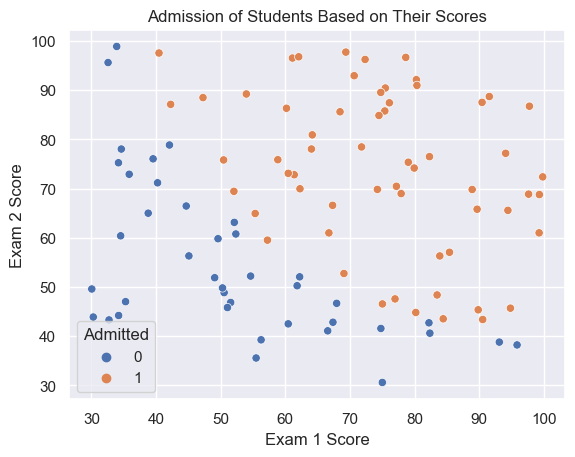

In [89]:
sns.scatterplot(df, x = 'exam 1', y = 'exam 2', hue = 'Admitted')
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.title("Admission of Students Based on Their Scores")
plt.show()


### Logistic Regression

In [90]:
from sklearn.model_selection import train_test_split

target = 'Admitted'

x= df.drop(target, axis = 1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.70, test_size=0.30, random_state=1)

In [91]:
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Making predictions

Will the student on the fourth of X_test pass?

In [93]:
X_test.take([3])

,exam 1,exam 2
81,94.834507,45.694307


In [95]:
y_pred[3]

1

According to our predictions, they will pass. Let's see the test data:

In [97]:
y_test.take([3])

81    1
Name: Admitted, dtype: int64

That was a correct prediction! Now let's check the model accuracy.

In [108]:
from sklearn.metrics import accuracy_score

print(f"Accuracy Score: {np.round(accuracy_score(y_test, y_pred),2)}")

Accuracy Score: 0.87


The model is very accurate!

### Model Evaluation

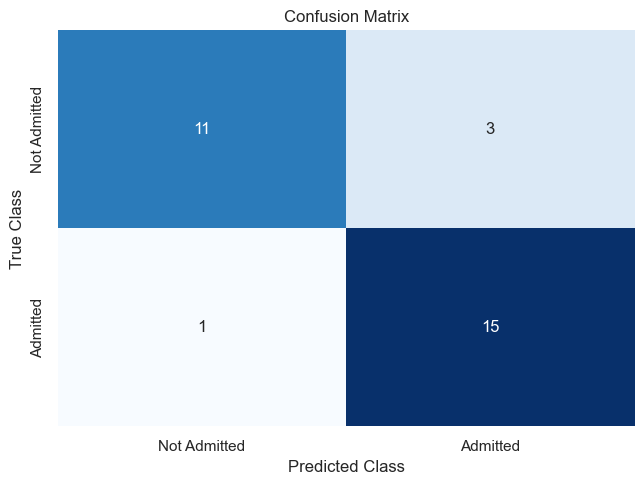

In [110]:
from sklearn.metrics import confusion_matrix
class_names = ['Not Admitted', 'Admitted']
matrix = confusion_matrix(y_test, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

As we can see in the confusion matrix, the model is pretty accurate. There was one False Negative and 3 False Positive out of all 30 cases. 

The precision was also pretty good. Out of all 16 truly admitted people, only one was falsely rejected.
From the 18 admitted people by the model, 3 were wrongfully not admitted.